# DataArray

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = np.random.rand(4, 3)
locs = ['IA', 'IL', 'IN']
times = pd.date_range('2000-01-01', periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [3]:
# minimal init 
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [5]:
xr.DataArray(
    data, 
    coords={'time': times, 
            'space': locs, 
            'const': 42, 
            'ranking': ('space', [1, 2, 3])},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [6]:
xr.DataArray(
    data,
    coords={'time': times,
            'space': locs,
            'const': 42,
            'ranking': (('time', 'space'), np.arange(12).reshape(4, 3))},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [7]:
df = pd.DataFrame({'x': [0, 1], 'y': [2, 3]}, index=['a', 'b'])
df.index.name = 'abc'
df.columns.name = 'xyz'
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [8]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

# DataArray Properties

In [9]:
foo.values

array([[0.44588882, 0.37303497, 0.13527187],
       [0.48141099, 0.569548  , 0.82036524],
       [0.56513648, 0.46877276, 0.46788333],
       [0.64308273, 0.48905776, 0.63274939]])

In [10]:
foo.dims

('time', 'space')

In [11]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [12]:
foo.attrs

{}

In [13]:
print(foo.name)

None


In [14]:
foo.values = 1.1 * foo.values
foo.values

array([[0.4904777 , 0.41033846, 0.14879905],
       [0.52955209, 0.6265028 , 0.90240176],
       [0.62165013, 0.51565004, 0.51467166],
       [0.707391  , 0.53796353, 0.69602433]])

In [15]:
foo.name = 'foo'
foo.attrs['units'] = 'meters'
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.4904777 , 0.41033846, 0.14879905],
       [0.52955209, 0.6265028 , 0.90240176],
       [0.62165013, 0.51565004, 0.51467166],
       [0.707391  , 0.53796353, 0.69602433]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [16]:
foo.rename('foofoo')

<xarray.DataArray 'foofoo' (time: 4, space: 3)>
array([[0.4904777 , 0.41033846, 0.14879905],
       [0.52955209, 0.6265028 , 0.90240176],
       [0.62165013, 0.51565004, 0.51467166],
       [0.707391  , 0.53796353, 0.69602433]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [17]:
foo.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [18]:
foo['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [19]:
foo['ranking'] = ('space', [1, 2, 3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int64 1 2 3

In [20]:
del foo['ranking']
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

### Dataset

In [21]:
temp = 15 + 8*np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]
ds = xr.Dataset({'temperature': (['x', 'y', 'time'], temp),
                 'precipitation': (['x', 'y', 'time'])},
                coords={'lon': (['x', 'y', lon]),
                        'lat': (['x', 'y', lat]),
                        'time': pd.date_range('2014-09-06', periods=3),
                        'reference_time': pd.Timestamp('2014-09-05')})
ds

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 9.42 9.149 24.15 ... 9.134 6.302 13.86

In [22]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.4905 0.4103 0.1488 ... 0.7074 0.538 0.696

In [23]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.4905 0.4103 0.1488 ... 0.7074 0.538 0.696

### Dataset contents

In [24]:
'temperature' in ds

True

In [25]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 9.41977487,  9.14911402, 24.15019535],
        [ 4.45979599, 11.15710257,  1.55139471]],

       [[27.00323366, 17.25939947, 24.87811895],
        [ 9.13382089,  6.30219991, 13.86273042]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [26]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 9.41977487,  9.14911402, 24.15019535],
        [ 4.45979599, 11.15710257,  1.55139471]],

       [[27.00323366, 17.25939947, 24.87811895],
        [ 9.13382089,  6.30219991, 13.86273042]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [27]:
ds.data_vars

Data variables:
    temperature  (x, y, time) float64 9.42 9.149 24.15 ... 9.134 6.302 13.86

In [28]:
ds.coords

Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [29]:
ds.attrs

{}

In [30]:
ds.attrs['title'] = 'Example Attribute'
ds

<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 9.42 9.149 24.15 ... 9.134 6.302 13.86
Attributes:
    title:    Example Attribute

### Dictionary-like Methods

In [31]:
ds = xr.Dataset()
ds['temperature'] = (('x', 'y', 'time'), temp)
ds['temperature_double'] = (('x', 'y', 'time'), 2 * temp)
ds['precipitation'] = (('x', 'y', 'time'), precip)
ds.coords['lat'] = (('x', 'y'), lat)
ds.coords['lon'] = (('x', 'y'), lon)
ds.coords['time'] = pd.date_range('2014-09-06', periods=3)
ds.coords['reference_time'] = pd.Timestamp('2014-09-05')

### Transforming Data Sets

In [32]:
ds[['temperature']]

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 9.42 9.149 24.15 ... 9.134 6.302 13.86

In [33]:
ds[['temperature', 'temperature_double']]

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 9.42 9.149 24.15 ... 6.302 13.86
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73

In [34]:
ds.drop_vars('temperature')

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73
    precipitation       (x, y, time) float64 6.876 -6.228 3.018 ... 7.777 8.707

In [35]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [36]:
ds.assign(temp2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 9.42 9.149 24.15 ... 6.302 13.86
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73
    precipitation       (x, y, time) float64 6.876 -6.228 3.018 ... 7.777 8.707
    temp2               (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73

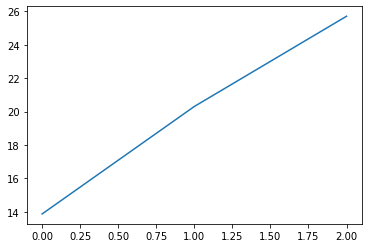

In [37]:
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'));

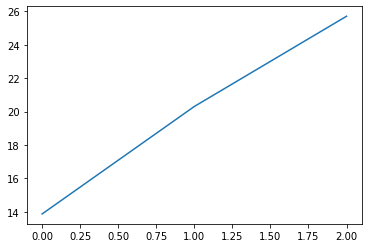

In [38]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean('y').pipe(plt.plot));

### Renaming Vars

In [39]:
ds.rename({'temperature': 'temp', 'precipitation': 'precip'})

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp                (x, y, time) float64 9.42 9.149 24.15 ... 6.302 13.86
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73
    precip              (x, y, time) float64 6.876 -6.228 3.018 ... 7.777 8.707

In [40]:
ds.coords['day'] = ('time', [6, 7, 8])
ds.swap_dims({'time': 'day'})

<xarray.Dataset>
Dimensions:             (day: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time                (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
  * day                 (day) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, day) float64 9.42 9.149 24.15 ... 6.302 13.86
    temperature_double  (x, y, day) float64 18.84 18.3 48.3 ... 18.27 12.6 27.73
    precipitation       (x, y, day) float64 6.876 -6.228 3.018 ... 7.777 8.707

### Coordinates

In [41]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8

In [42]:
ds.reset_coords()

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 9.42 9.149 24.15 ... 6.302 13.86
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73
    precipitation       (x, y, time) float64 6.876 -6.228 3.018 ... 7.777 8.707
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int64 6 7 8

In [43]:
ds.set_coords(['temperature', 'precipitation'])

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    temperature         (x, y, time) float64 9.42 9.149 24.15 ... 6.302 13.86
    precipitation       (x, y, time) float64 6.876 -6.228 3.018 ... 7.777 8.707
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 18.84 18.3 48.3 ... 12.6 27.73

In [44]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[ 9.41977487,  9.14911402, 24.15019535],
        [ 4.45979599, 11.15710257,  1.55139471]],

       [[27.00323366, 17.25939947, 24.87811895],
        [ 9.13382089,  6.30219991, 13.86273042]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

### Coordinate Methods

In [45]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [46]:
alt = xr.Dataset(coords={'z': [10], 'lat': 0, 'lon': 0})
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8
  * z               (z) int64 10
Data variables:
    *empty*

### Indices

In [47]:
ds['time'].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [48]:
ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

### Multi-Index Coordinates

In [49]:
midx = pd.MultiIndex.from_arrays(
    [['R', 'R', 'V', 'V'], [0.1, 0.2, 0.7, 0.9]], names=('band', 'wn'))
mda = xr.DataArray(np.random.rand(4), coords={'spec': midx}, dims='spec')
mda

<xarray.DataArray (spec: 4)>
array([0.26935627, 0.83131842, 0.09409254, 0.79991099])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [50]:
mda['band']

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [52]:
mda.wn

<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9